## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?

Generally speaking, regression is meant to predict a value, while classification is meant to predict a certain group. It's worth asking if the target variable is numerical (likely regression) vs categorical (likely classification).

2. What is a confusion table? What does it help us understand about a model's performance?

A confusion matrix is a tool for evaluating a classification model. It is a cross table that lists actual vs predicted values. This allows us to see for each class how often the model predicts correctly, and when it makes mistakes which classes are being predicted instead.

3. What does the SSE quantify about a particular model?

SSE stands for sum of the squared error, and is calculated by literally taking the sum of the squared errors (differences between predicted and actual values). The square ensures all values are positive, meaning under/over-predicting is just as punishing (otherwise they would cancel each other out when summed). This provides a metrix for how accurate a regression model is - the lower the SSE, the closer the model's predictions are to the true values.

4. What are overfitting and underfitting?

Underfitting is when the model is not strong enough to learn the underlying relationships and does not accurately model the data. This can be caused by problems such as not having a high enough learning rate or having too few parameters. Overfitting is the opposite, where the model is too strong and learns the sample dataset too well. It starts learning features specific to the dataset and not the underlying population (essentially memorizing the data) and will perform well on training data but may fall off when using a test set. This could be caused by having too many parameters, or training a model for too long.

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

Splitting into training and test sets lets us account for potential overfitting. If we only test the model on training data, we will not know how the model will perform when seeing a new set of data, so we cannot know if the model has only learned the sample data or if it has actually learned the underlying trends. Holding out data to be used as a test set serves as a sanity check to make sure our model is working in the way we think it is.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Reporting a probability distribution gives not only a class prediction, but also the confidence the model has in that prediction. This is generally preferrable to solely reporting a class label, because it gives a more accurate representation of what the model thinks. In a binary classification problem, knowing that the model thinks a data point is some class with a 55% chance vs a 90% chance is a meaningful distinction, so it is useful to have this extra information. That being said, only predicting a label can simplify the problem and make a model easier to interpret, which could be useful in certain problems when the extra nuance is unnecessary.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [2]:
import numpy as np
import pandas as pd

df=pd.read_csv('./data/USA_cars_datasets.csv')
df=df.loc[:,['price','year','mileage']]
print(df.head())
print(df.describe())
print(df.shape)

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06
(2499, 3)


Each variable has 2499 values, and using df.shape shows 2499 rows in the dataset.

2. Maxmin normalize `year` and `mileage`.

In [5]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u
df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])
print(df.head())

   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


3. Split the sample into ~80% for training and ~20% for evaluation.

In [7]:
from sklearn.model_selection import train_test_split
x = df.loc[:,['year','mileage']]
y = df.loc[:,'price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1999, 2)
(500, 2)
(1999,)
(500,)


4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

k=3, MSE=127089272.066


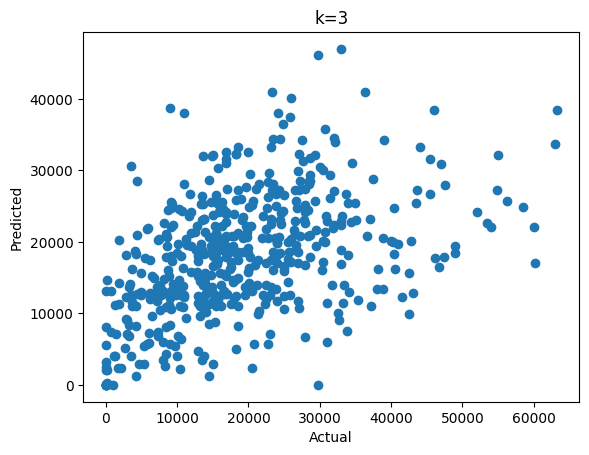

k=10, MSE=110308768.07981999


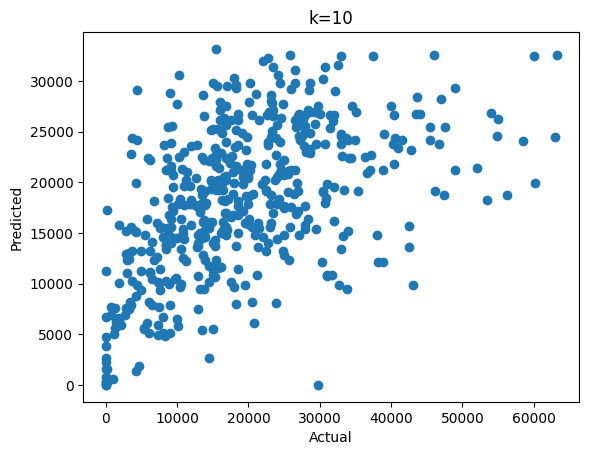

k=25, MSE=108391844.7674656


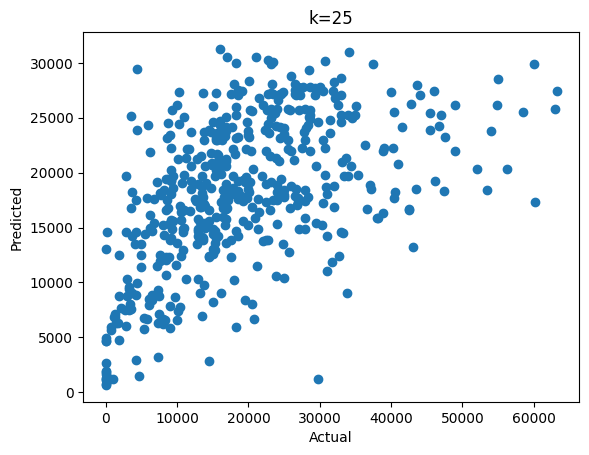

k=50, MSE=107653291.0376976


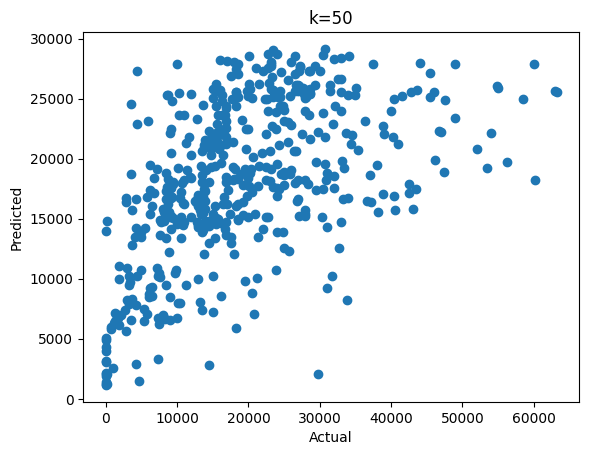

k=100, MSE=108254114.4133716


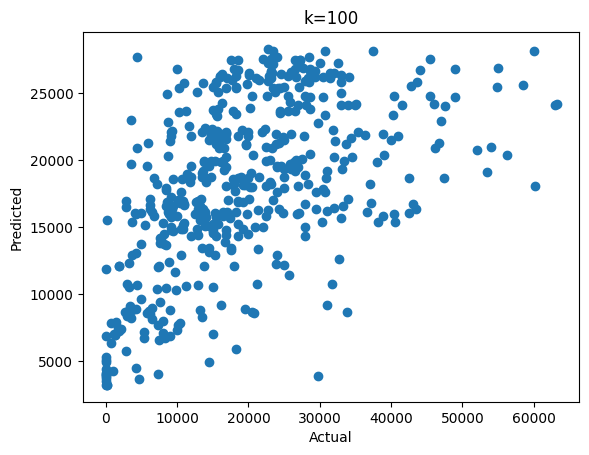

k=300, MSE=110159246.60529825


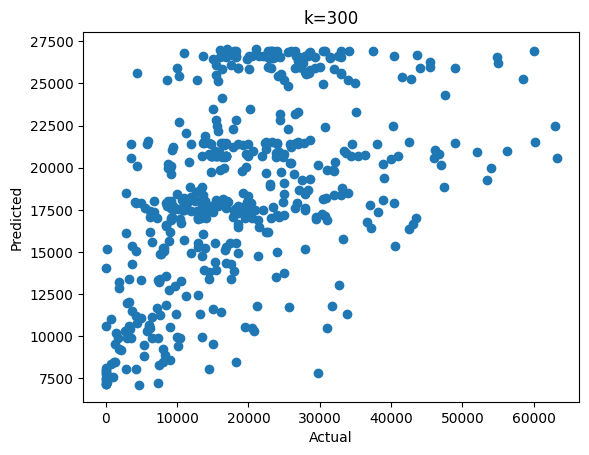

In [8]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = np.mean((y_pred-y_test)**2)
    print(f'k={k}, MSE={mse}')
    plt.scatter(y_test,y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'k={k}')
    plt.show()


Increasing k generally seems to decrease MSE. The predicted values also span a lower range, showing the predictions seem to be more concentrated around the actual values.

5. Determine the optimal $k$ for these data.

Optimal k: 28


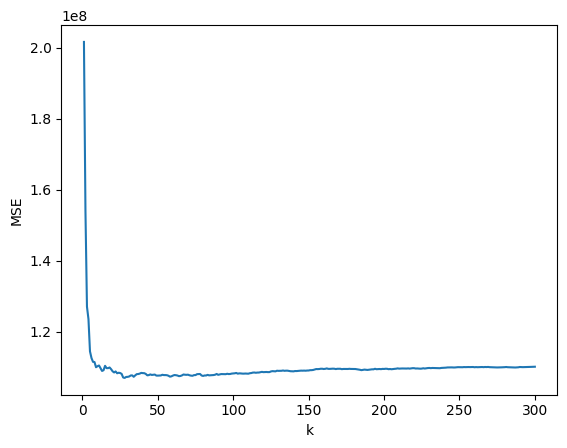

In [12]:
k=np.arange(1,301)
mse=[]
for i in k:
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse.append(np.mean((y_pred-y_test)**2))
plt.plot(k,mse)
plt.xlabel('k')
plt.ylabel('MSE')

min=np.argmin(mse)
print(f'Optimal k: {k[min]}')

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

I found the optimal value of k to be around 28. This means that for the earlier graphs, the ones with k < 28 were likely underfitting, meaning that since k was not large enough, the model could not properly capture the relationships in the data. When k > 28, the model was likely overfitting, meaning k was too high and the model could learn the training dataset (as an extreme example, if k is large enough there can be a group for every point in the data). This means 3 and 10 were probably underfitting, 50, 100, and 300 were probably overfitting, and k=25 was likely close enough to the best value to produce a reasonable model.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.